In [1]:
import pandas as pd
import numpy as np
from path import Path  # pip install --user path.py
import re
from IPython.display import display
from pprint import pprint

In [2]:
# load seaborn and other stuff for visualization
import seaborn  # pip install --user seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
classes = pd.read_pickle("classes.pkl")
node_pairs = pd.read_pickle("paths_with_classes.pkl").drop("shortest_path", axis=1)

In [4]:
TEST_RESULT_DIRECTORIES = Path("/home/shibbiry/Dropbox/documents/msu/bachelors_thesis_cluster_topology/test_results") \
    .dirs()

In [5]:
def read_benchmark_hostnames(path_to_file):
    lines = path_to_file.lines()
    return (re.match(r"^(n\d{5})\.", line).groups()[0] for line in lines)

In [6]:
for directory in TEST_RESULT_DIRECTORIES:
    hostnames = frozenset(read_benchmark_hostnames(directory.joinpath("network_hosts.txt")))
    
    pairs_tested = node_pairs[
        node_pairs["node1"].isin(hostnames) &
        node_pairs["node2"].isin(hostnames)
    ]
    
    display("{0}/{1}".format(len(pairs_tested["class_"].unique()), len(classes)))

'7/7'

'7/7'

'7/7'

'7/7'

## Load and parse netcdf

In [7]:
import netCDF4

In [33]:
def import_data(directory):
    hostnames = tuple(read_benchmark_hostnames(directory.joinpath("network_hosts.txt")))
    with netCDF4.Dataset(directory.joinpath("network_median.nc"), "r")  as dataset:
        step_len = dataset["step_length"][0]
        start_len = dataset["begin_mes_length"][0]
        end_len = assert dataset["end_mes_length"][0]
        
        assert len(hostnames) == dataset["proc_num"][0]
        assert dataset["test_type"][0] == 1
        assert start_len == 0
        assert end_len == 10000
        assert step_len == 100
        steps = (end_len - start_len) // step_len
        assert start_len + steps * step_len == end_len
        
        lengths = range(start_len, end_len + step_len, step_len)
        
        data = {
            "message_len_{0}".format(length): dataset["data"][index]
            for (index, length) in enumerate(lengths)}
        data_len_0 = pd.DataFrame(dataset["data"][0], index=hostnames, columns=hostnames)
    return data_len_0

In [9]:
data = import_data(TEST_RESULT_DIRECTORIES[0])

In [10]:
def heatmap_big(data):
    big_plot_size = (17, 9)  # inches
    fig, ax = plt.subplots(figsize=big_plot_size)
    seaborn.heatmap(ax=ax, data=data)

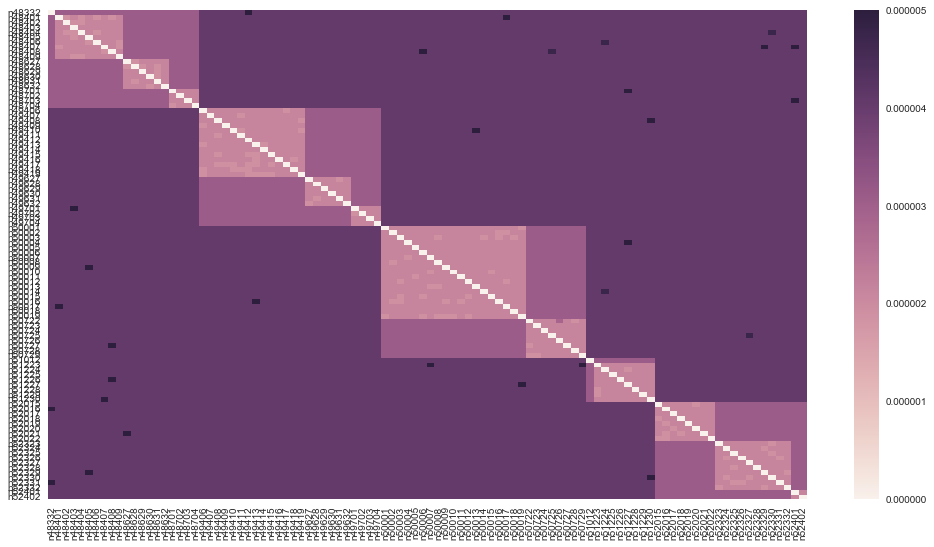

In [11]:
heatmap_big(data)

In [12]:
# todo check whether data is close to symmetrical
# meaning that forall A, B ping(A, B) is about the same as ping(B, A)

## How symmetric is ping?

It's important to know whether ping from A to B is usually about the same as ping from B to A

In [13]:
def pd_triu(df):
    """see numpy.triu"""
    return pd.DataFrame(np.triu(df), columns=df.columns, index=df.index)

In [14]:
assert (data.columns == data.transpose().columns).all()
assert (data.index == data.transpose().index).all()
asymmetric_difference = pd_triu((data - data.transpose()))

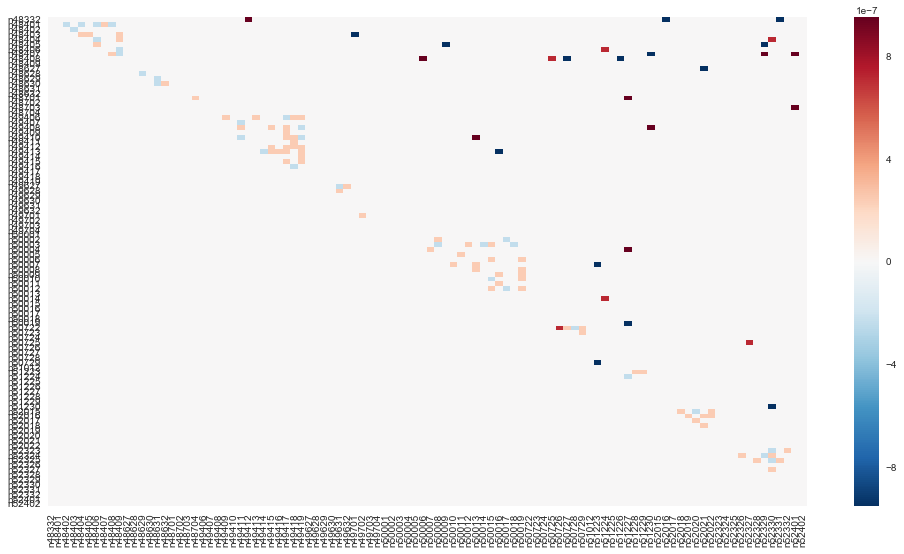

In [15]:
heatmap_big(asymmetric_difference)

In [16]:
# todo
# написать рисовалку хитмап одного слоя data
# и каких-нибудь там 3д отображений одного слоя data с погрешностью
# написать предсказывалку, берущую медиану из соотв. класса
# посчитать какую-нибудь метрику для этой предсказывалки

In [17]:
# todo v2
#
# 1
# определить, насколько хорошо мой алгоритм предсказания работает на какой-нибудь там метрике
# обучаю на 1 наборе экспериментальных данных, предсказываю на остальных наборах
# или беру 1 набор экспериментальных данных, убираю из него часть узлов и предсказываю для них
# 
# 2
# для всех папок с экспериментальными данными определить, насколько эти данные хорошие
# например если какая-нибудь средняя погрешность часто соразмерна самому пингу, то
# это очень плохо

## Fit model

In [18]:
directory = TEST_RESULT_DIRECTORIES[0]
df = import_data(directory)


,n48332,n48401,n48402,n48403,n48404,n48405,n48406,n48407,n48408,n48409,...,n52325,n52326,n52327,n52328,n52329,n52330,n52331,n52332,n52401,n52402
n48332,0.000000,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48401,0.000003,0.000000,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48402,0.000003,0.000002,0.000000,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48403,0.000003,0.000002,0.000002,0.000000,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48404,0.000003,0.000002,0.000002,0.000002,0.000000,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000005,0.000004,0.000004,0.000004,0.000004
n48405,0.000003,0.000002,0.000002,0.000002,0.000002,0.000000,0.000002,0.000002,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48406,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000000,0.000002,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48407,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000000,0.000002,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000005,0.000004,0.000004,0.000004,0.000005,0.000004
n48408,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000000,0.000002,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
n48409,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000000,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
